Import ee, geemap and ndvi2gif

In [21]:
import ee
import geemap
from ndvi2gif import ndvi_seasonality
from IPython.display import Image

In [ ]:
#You could need a first login to sart with python Earth Enginelogin 
ee.Initialize()

In the next cell you can search on the map and draw a polygon in your Region of Interest (ROI)

In [ ]:
Map = geemap.Map()
Map.add_basemap('Google Satellite')
Map

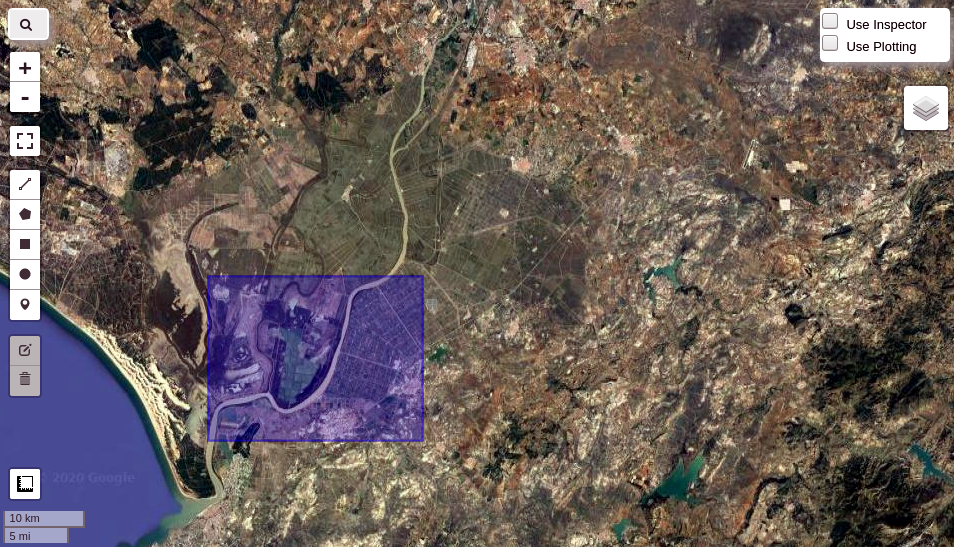

In [22]:
# Map and roi example.
Image('./pics/roi_example.png')

Now whe are going to use the last roi drawn on the map. Remember to re run this cell any time you want to change yor roi. If you don't draw any roi on the map, you will get deafult area, that it is Doñana Natural Space area. But in any case, you should at least run the map cell. 

In [ ]:
roi = Map.draw_last_feature
print(roi.geometry().getInfo())

Now, instance the class ndvi_seasonality. Parameters in this class are roi, start_year, last_year and satellite. Defaults values are Doñana roi, 2016, 2020 (it will does one year less) and Sentinel.

If you want to change some of the values just type something like:
#### myclass = ndvi_seasonality(roi, 2000, 2015, 'Landsat') 
or 
#### myclass = ndvi_seasonality(roi=roi, start_year=2000, end_year=2015, sat='Landsat)

In [ ]:
doñana = ndvi_seasonality(roi)

Of course, you could play with your outputs bands, using the amazing Map that Geemap provides, so you could display your ndvi collections on the map, get pixels values or even get spectral profiles.

Besides, you can use the same capacities that Google Earth Engine provides, for instance, you can select just some bandas and display its minimun, median or whatever combination you would like to do. Also, you can adjust the histogram of the display with min an max values and you also can change the bands to display. 

In [ ]:
wintermax = doñana.get_year_composite().select('winter').max()
median = doñana.get_year_composite().median()
Map.addLayer(wintermax, {'min': 0, 'max': 0.75}, 'winterMax')
Map.addLayer(median, {'min': 0.1, 'max': 0.8}, 'median') 

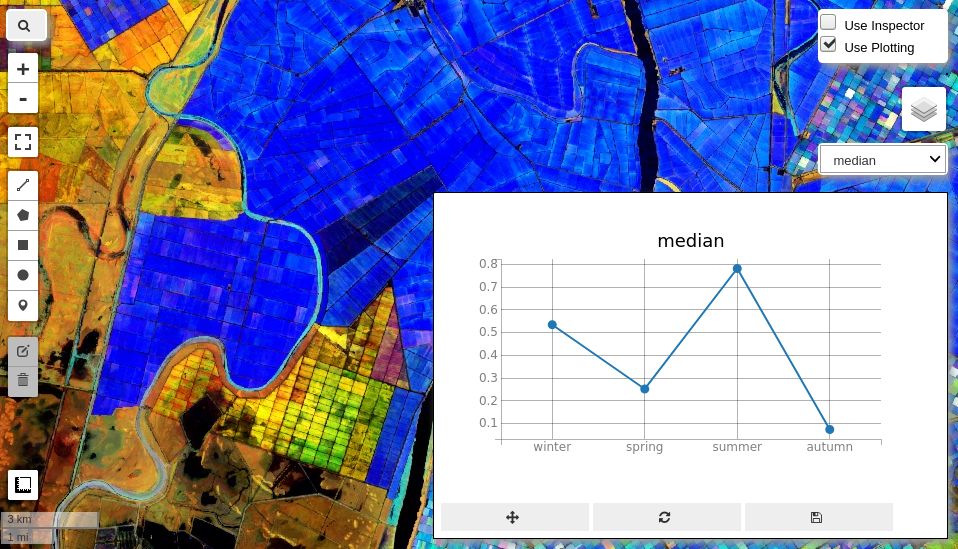

In [3]:
# ndvi seasonal composite and spectral profile example
Image('./pics/profile.png')

But we are here for he gifs, so to generate them, once that you have defined the class parameters, just run he cell below. In get_gif method, you cand define output name for the gif, and also the bands cambination that will be showed in the gif. 
Defaults are mygif.gif and mygif_texted.gif (you will get 2 gif, once of them with the years appearing in the down left corner) and ['winter', 'spring', 'summer] as the band combination. 

You could change both of them like this:
#### myclass.get_gif(name='mywishedname.gif', bands=['seasonA', 'seasonB', 'seasonC']. 

Of course, seasons available are... seasons (winter, spring, summer and autumn). In some regions differnet combinations throw more beatiful colors. For instance, you should avoid winter band in palces where the winter is very strong.

In [ ]:
doñana.get_gif()

You should get this message:

Generating URL...
Downloading GIF image from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/83b23825009c92762ea446f0482c1602-1a5f7009a9fa773d28b462346a696814:getPixels
Please wait ...
The GIF image has been saved to: ~/mygif.gif

In [19]:
%%html
<img src="./pics/LosPalacios_Spain.gif">

Last but not least, you have the extra choice to export your ndvi_seasonality collection to tif files to your computer. Executing next cell you will get one raser per year in your collection with four bands, once for each seasons. So, this way you could keeping analyzing your data with QGIS or any other software.

Here you can choose teh Coordinate Reference System (crs), deafult is EPSG:4326, but you could change in case you want it, just by typing your desired crs in this way: 

#### myclass.get_export(crs='EPSG:32629')

In [ ]:
doñana.get_export()

You should get this message for every year in your collection:

Generating URL ...
Downloading data from https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/076fe351cf55f3f46228339e146d9db1-ac2e93b28d6d1a0921e04b0276da058a:getPixels
Please wait ...
Data downloaded to ~/ndvi_2016.tif

#### Default folder for the downloads is your current working directory!!